# Download data

In [1]:
! wget https://github.com/farhanwew/Deep-L/raw/refs/heads/main/jpy.csv

--2025-03-19 15:19:45--  https://github.com/farhanwew/Deep-L/raw/refs/heads/main/jpy.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/farhanwew/Deep-L/refs/heads/main/jpy.csv [following]
--2025-03-19 15:19:45--  https://raw.githubusercontent.com/farhanwew/Deep-L/refs/heads/main/jpy.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5701 (5.6K) [text/plain]
Saving to: ‘jpy.csv’

jpy.csv             100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-03-19 15:19:45 (60.9 MB/s) - ‘jpy.csv’ saved [5701/5701]



# import Dependencies


In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import torch.optim as optim

In [3]:
torch.manual_seed(42)
np.random.seed(42)

# set cuda

In [4]:
# prompt: set cuda

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

# Load data

In [5]:
df = pd.read_csv('jpy.csv')
df.head()

,Tahun,JPY
0,2025-Januari,10.52363
1,2024-Desember,10.23625
2,2024-November,10.45301
3,2024-Oktober,10.25989
4,2024-September,10.56644


information of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tahun   289 non-null    object 
 1   JPY     289 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [7]:
bulan_indo_ke_eng = {
    "Januari": "January", "Februari": "February", "Maret": "March",
    "April": "April", "Mei": "May", "Juni": "June",
    "Juli": "July", "Agustus": "August", "September": "September",
    "Oktober": "October", "November": "November", "Desember": "December"
}

# Fungsi untuk mengonversi format
def convert_to_datetime(date_str):
    tahun, bulan_indo = date_str.split('-')
    bulan_eng = bulan_indo_ke_eng[bulan_indo]  # Terjemahkan ke Inggris
    return datetime.strptime(f"{tahun}-{bulan_eng}", "%Y-%B")

# Terapkan ke DataFrame
df["tanggal_datetime"] = df["Tahun"].apply(convert_to_datetime)


print(df.head())

            Tahun       JPY tanggal_datetime
0    2025-Januari  10.52363       2025-01-01
1   2024-Desember  10.23625       2024-12-01
2   2024-November  10.45301       2024-11-01
3    2024-Oktober  10.25989       2024-10-01
4  2024-September  10.56644       2024-09-01


Konversi ke date time

In [8]:
df['tanggal_datetime'] = pd.to_datetime(df['tanggal_datetime'])
df.set_index('tanggal_datetime', inplace=True)
df.head()

,Tahun,JPY
tanggal_datetime,,
2025-01-01,2025-Januari,10.52363
2024-12-01,2024-Desember,10.23625
2024-11-01,2024-November,10.45301
2024-10-01,2024-Oktober,10.25989
2024-09-01,2024-September,10.56644


# sort index (agar dari tahun 2001 hingga 2023)

In [9]:
df = df.sort_index()
df

,Tahun,JPY
tanggal_datetime,,
2001-01-01,2001-Januari,8.13149
2001-02-01,2001-Februari,8.45297
2001-03-01,2001-Maret,8.37000
2001-04-01,2001-April,9.42066
2001-05-01,2001-Mei,9.21733
...,...,...
2024-09-01,2024-September,10.56644
2024-10-01,2024-Oktober,10.25989
2024-11-01,2024-November,10.45301


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2001-01-01 to 2025-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tahun   289 non-null    object 
 1   JPY     289 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


Normalisasi data

In [11]:
# Normalisasi data
scaler = MinMaxScaler()
df['JPY'] = scaler.fit_transform(df[['JPY']])

Alasan mengapa indexing dari 2022-01-01 karena test data membutuhkan sequence 12 bulan sebelumnya


In [12]:
# Traiing dari 2001 hingga 2022 - 12 - 31
train_data = df.loc['2001-01-01':'2022-12-01']

# Alasan mengapa indexing dari 2022-01-01 karena test data membutuhkan sequence 12 sebelumnya
test_data = df.loc['2022-01-01':'2023-12-01']

In [13]:
train_data

,Tahun,JPY
tanggal_datetime,,
2001-01-01,2001-Januari,0.149084
2001-02-01,2001-Februari,0.188417
2001-03-01,2001-Maret,0.178266
2001-04-01,2001-April,0.306815
2001-05-01,2001-Mei,0.281937
...,...,...
2022-08-01,2022-Agustus,0.468769
2022-09-01,2022-September,0.443263
2022-10-01,2022-Oktober,0.446767


In [14]:
test_data

,Tahun,JPY
tanggal_datetime,,
2022-01-01,2022-Januari,0.677130
2022-02-01,2022-Februari,0.687618
2022-03-01,2022-Maret,0.597181
2022-04-01,2022-April,0.532843
2022-05-01,2022-Mei,0.551992
2022-06-01,2022-Juni,0.488258
2022-07-01,2022-Juli,0.504187
2022-08-01,2022-Agustus,0.468769
2022-09-01,2022-September,0.443263


membuat sequence data (menggunakan sliding window)

Fungsi berfungsi untuk mengubah data deret waktu (time series) menjadi format yang bisa digunakan untuk model prediksi.
jadi data 12 bulan sebelumnya sebagai acuan

In [15]:
sequence_length = 12

def create_sequences(data, sequence_length):
    sequences = []
    labels = []

    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]  # Ambil sequence selama 'sequence_length' bulan
        label = data[i+sequence_length]  # Nilai yang akan diprediksi (bulan berikutnya)

        sequences.append(seq)
        labels.append(label)

    return np.array(sequences), np.array(labels)

In [16]:
train_sequences, train_labels = create_sequences(train_data['JPY'].values, sequence_length)
test_sequences, test_labels = create_sequences(test_data['JPY'].values, sequence_length)

print(f'Train sequences shape: {train_sequences.shape}')
print(f'Test sequences shape: {test_sequences.shape}')


Train sequences shape: (252, 12)
Test sequences shape: (12, 12)


data latih dan data uji menjadi tensor PyTorch

In [17]:
try:
  X_train = torch.tensor(train_sequences, dtype=torch.float32).unsqueeze(-1).to(device)
  y_train = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(-1).to(device)
  X_test = torch.tensor(test_sequences, dtype=torch.float32).unsqueeze(-1).to(device)
  y_test = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(-1).to(device)
except:
  X_train = torch.tensor(train_sequences, dtype=torch.float32).unsqueeze(-1)
  y_train = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(-1)
  X_test = torch.tensor(test_sequences, dtype=torch.float32).unsqueeze(-1)
  y_test = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(-1)

# Model

In [18]:
class CustomRNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout):
        super(CustomRNN, self).__init__()
        self.num_layers = len(hidden_sizes)
        self.rnn_layers = nn.ModuleList()

        # Layer pertama: input_size -> hidden_sizes[0]
        self.rnn_layers.append(nn.RNN(input_size, hidden_sizes[0], batch_first=True))

        # Layer tengah: hidden_sizes[i] -> hidden_sizes[i+1]
        for i in range(len(hidden_sizes) - 1):
            self.rnn_layers.append(nn.RNN(hidden_sizes[i], hidden_sizes[i + 1], batch_first=True))

        # Fully connected layer untuk output
        self.fc = nn.Linear(hidden_sizes[-1], output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        for rnn in self.rnn_layers:
            x, _ = rnn(x)
            x = self.dropout(x)  # Dropout setelah setiap layer

        out = self.fc(x[:, -1, :])  # Ambil output dari timestep terakhir
        return out


class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout):
        super(CustomLSTM, self).__init__()
        self.num_layers = len(hidden_sizes)
        self.lstm_layers = nn.ModuleList()

        # Layer pertama
        self.lstm_layers.append(nn.LSTM(input_size, hidden_sizes[0], batch_first=True))

        # Layer berikutnya
        for i in range(len(hidden_sizes) - 1):
            self.lstm_layers.append(nn.LSTM(hidden_sizes[i], hidden_sizes[i + 1], batch_first=True))

        self.fc = nn.Linear(hidden_sizes[-1], output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        for lstm in self.lstm_layers:
            x, _ = lstm(x)
            x = self.dropout(x)

        out = self.fc(x[:, -1, :])
        return out

In [19]:
configs = [
    # Model Sederhana (Baseline)
    {"hidden_sizes": [16], "dropout": 0.1, "lr": 0.001, "epochs": 10, "optimizer": "Adam"},
    {"hidden_sizes": [32], "dropout": 0.1, "lr": 0.0008, "epochs": 15, "optimizer": "Adam"},

    # Model mid-lah
    {"hidden_sizes": [64, 128], "dropout": 0.25, "lr": 0.0005, "epochs": 25, "optimizer": "Adam"},
    {"hidden_sizes": [64, 128, 256], "dropout": 0.3, "lr": 0.0003, "epochs": 30, "optimizer": "RMSprop"},
    {"hidden_sizes": [128, 256], "dropout": 0.35, "lr": 0.0002, "epochs": 35, "optimizer": "AdamW"},

    # Model Kompleks
    {"hidden_sizes": [128, 256, 512], "dropout": 0.4, "lr": 0.0001, "epochs": 40, "optimizer": "Adam"},
    {"hidden_sizes": [256, 512, 1024], "dropout": 0.45, "lr": 0.00005, "epochs": 50, "optimizer": "AdamW"},
    {"hidden_sizes": [512, 1024, 2048], "dropout": 0.5, "lr": 0.00001, "epochs": 60, "optimizer": "Adam"},

    # Model Tambahan
    {"hidden_sizes": [128, 256, 512], "dropout": 0.3, "lr": 0.0003, "epochs": 30, "optimizer": "SGD"},
    {"hidden_sizes": [64, 128, 256, 512], "dropout": 0.4, "lr": 0.0001, "epochs": 50, "optimizer": "Adam"}
]

Paramater

In [20]:
input_size = 1
output_size = 1
loss_histories = []


Training Model 1: Layers=1, Hidden Sizes=[16], Dropout=0.1, LR=0.001, Epochs=10, Optimizer=Adam


Model 1 Training Progress: 100%|██████████| 10/10 [00:00<00:00, 255.29it/s]

Epoch 1/10 -> RNN Loss: 0.21141, LSTM Loss: 0.26294
Epoch 10/10 -> RNN Loss: 0.14004, LSTM Loss: 0.20577


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

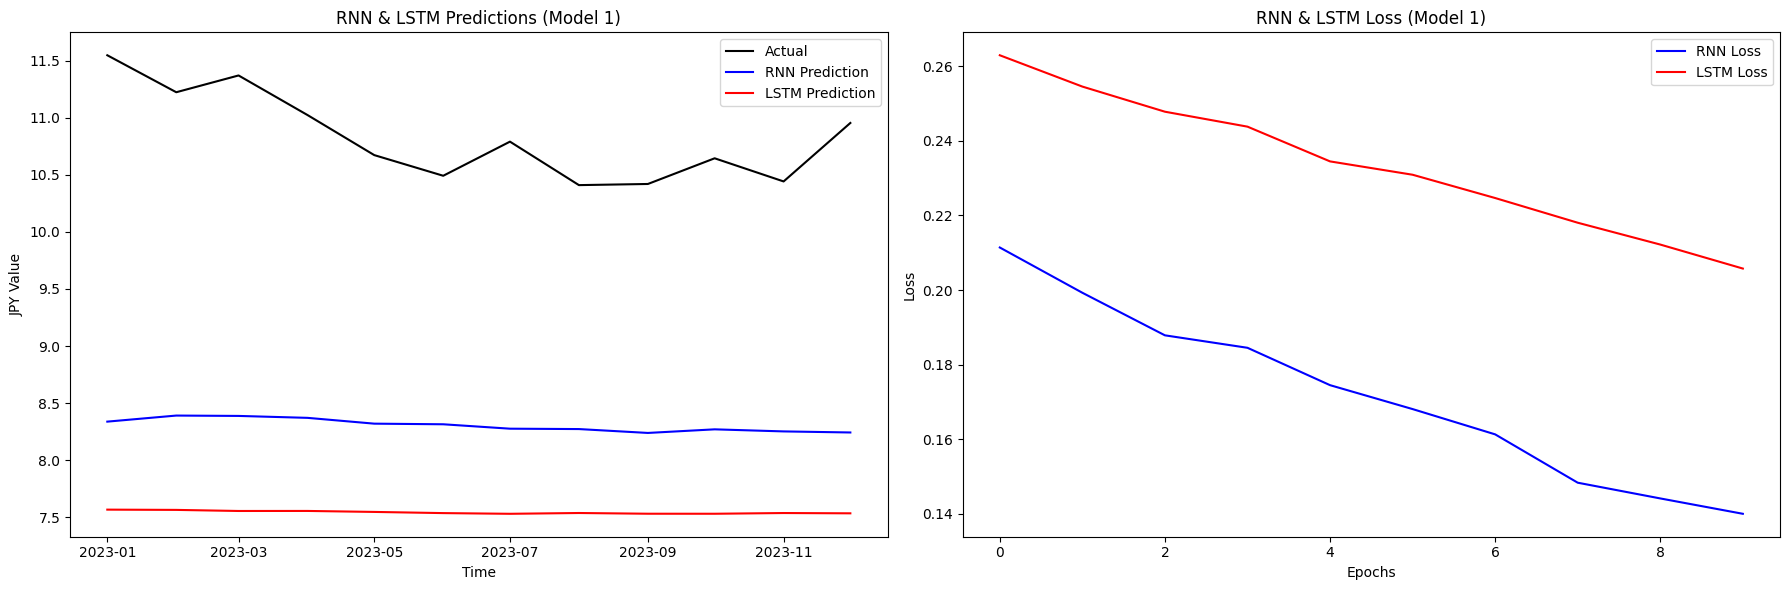


Training Model 2: Layers=1, Hidden Sizes=[32], Dropout=0.1, LR=0.0008, Epochs=15, Optimizer=Adam


Model 2 Training Progress: 100%|██████████| 15/15 [00:00<00:00, 242.30it/s]

Epoch 1/15 -> RNN Loss: 0.24553, LSTM Loss: 0.18302
Epoch 10/15 -> RNN Loss: 0.11413, LSTM Loss: 0.13718


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

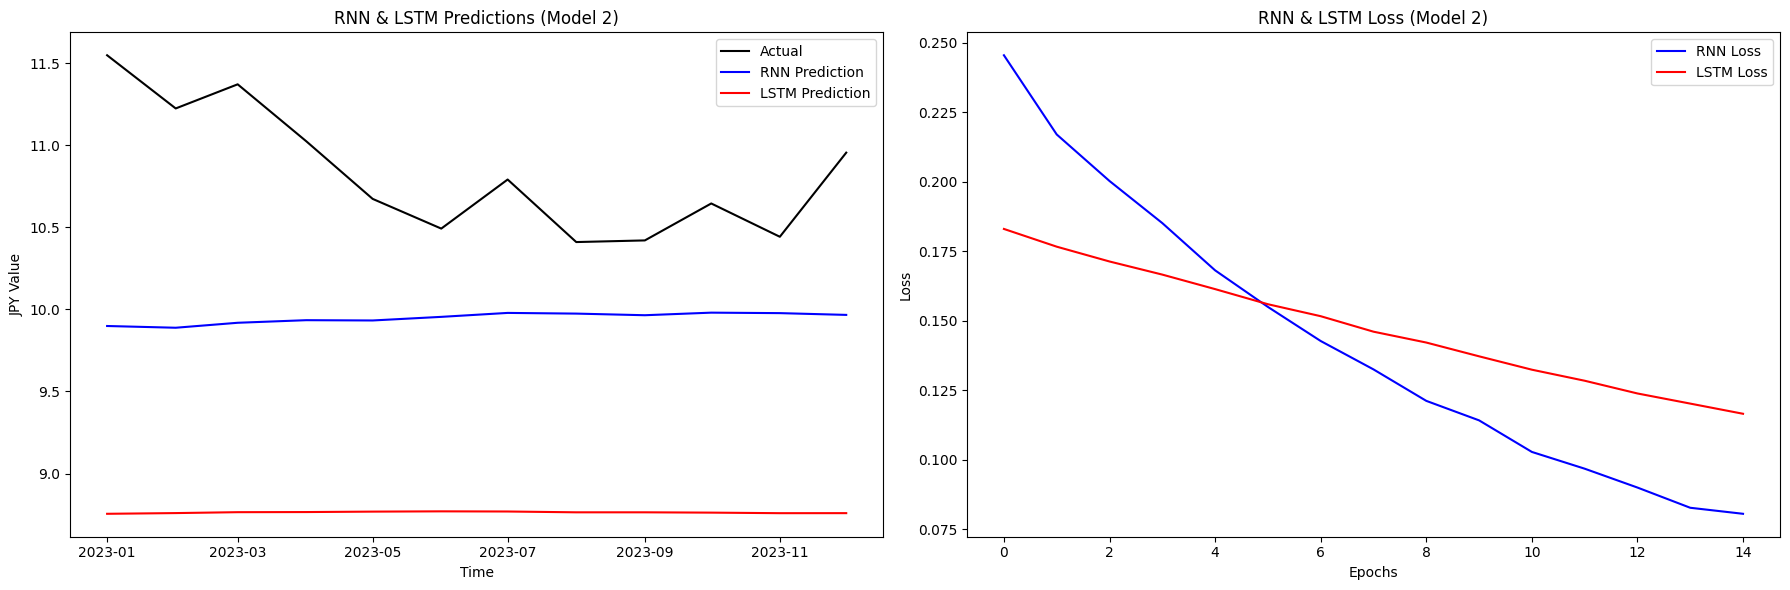


Training Model 3: Layers=2, Hidden Sizes=[64, 128], Dropout=0.25, LR=0.0005, Epochs=25, Optimizer=Adam


Model 3 Training Progress: 100%|██████████| 25/25 [00:00<00:00, 141.79it/s]

Epoch 1/25 -> RNN Loss: 0.28781, LSTM Loss: 0.24183
Epoch 10/25 -> RNN Loss: 0.08141, LSTM Loss: 0.10973
Epoch 20/25 -> RNN Loss: 0.05227, LSTM Loss: 0.06861


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

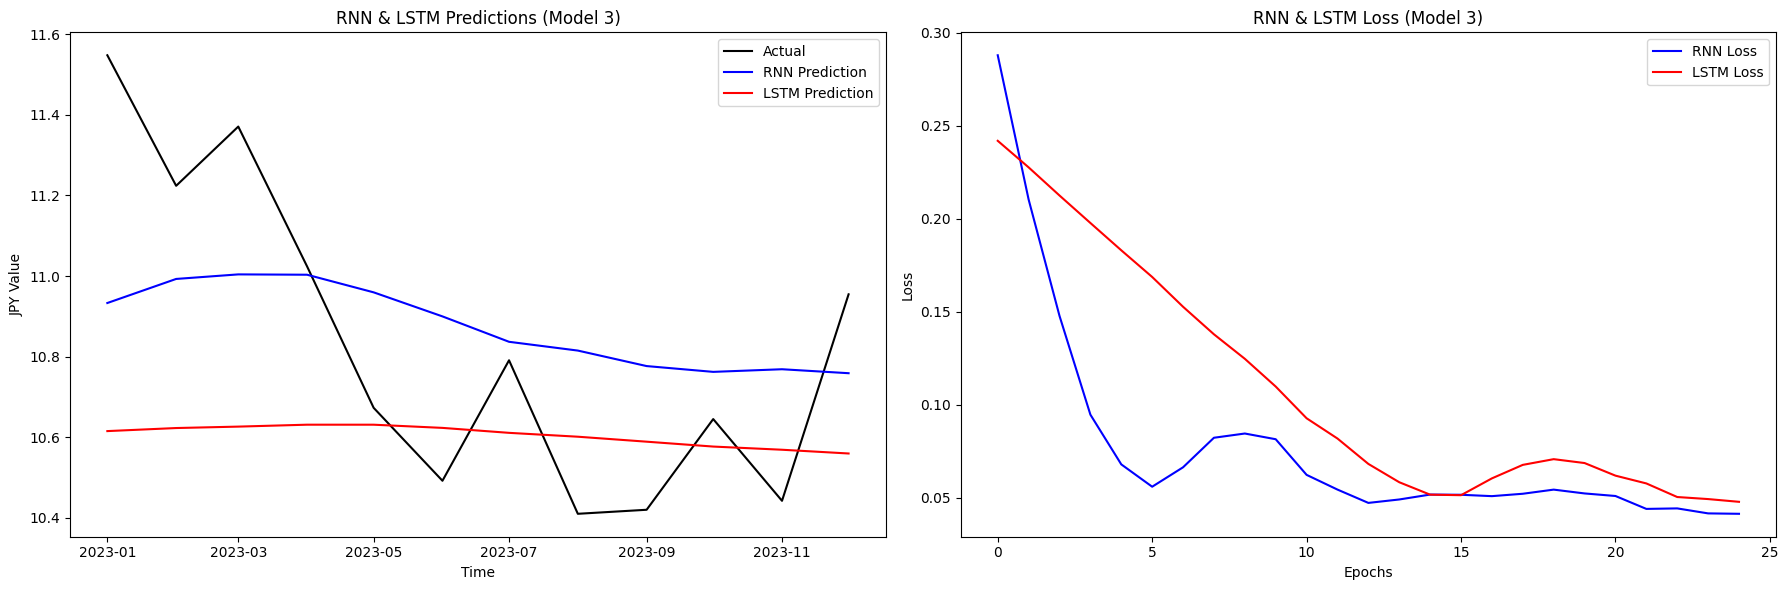


Training Model 4: Layers=3, Hidden Sizes=[64, 128, 256], Dropout=0.3, LR=0.0003, Epochs=30, Optimizer=RMSprop


Model 4 Training Progress:  27%|██▋       | 8/30 [00:00<00:00, 73.56it/s]

Epoch 1/30 -> RNN Loss: 0.27057, LSTM Loss: 0.32946
Epoch 10/30 -> RNN Loss: 0.04125, LSTM Loss: 0.05329


Model 4 Training Progress: 100%|██████████| 30/30 [00:00<00:00, 90.17it/s]


Epoch 20/30 -> RNN Loss: 0.01223, LSTM Loss: 0.03530
Epoch 30/30 -> RNN Loss: 0.01063, LSTM Loss: 0.02267


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

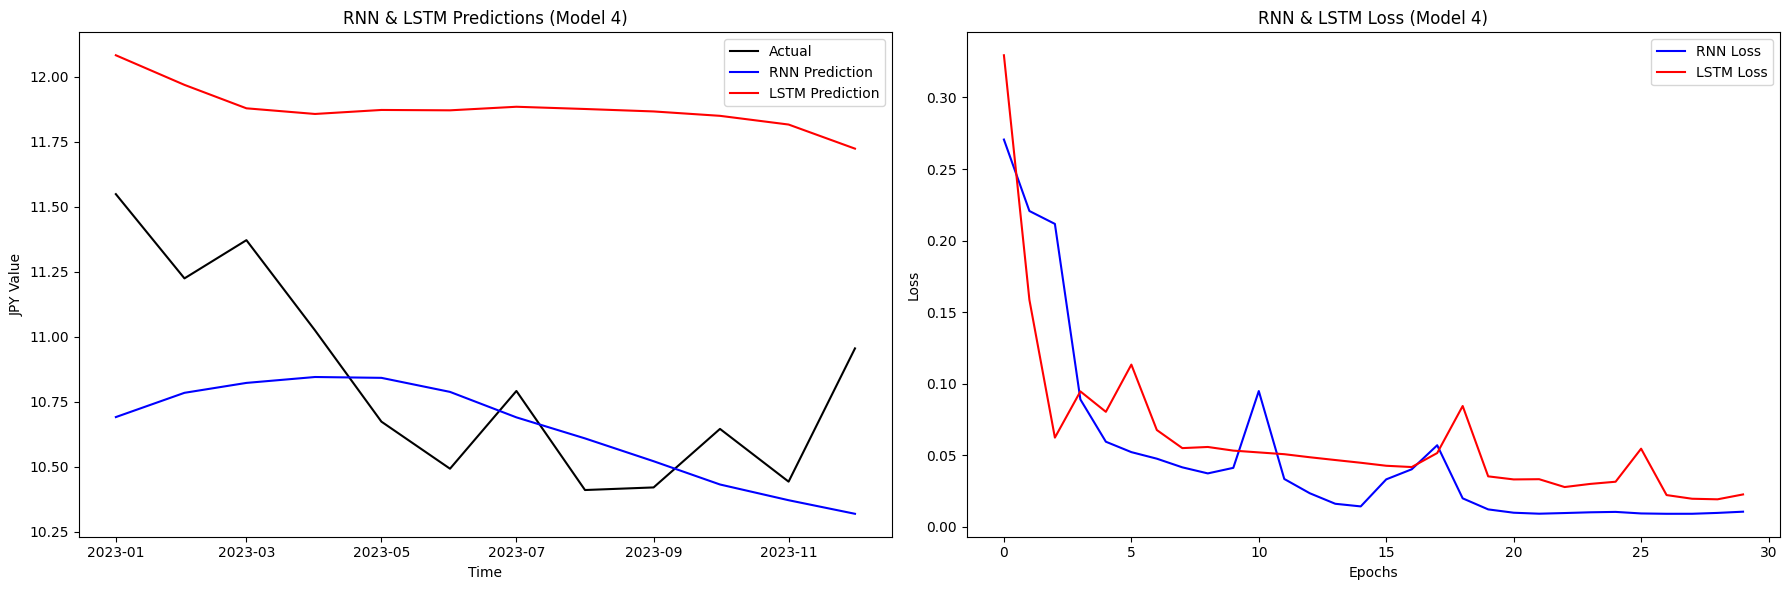


Training Model 5: Layers=2, Hidden Sizes=[128, 256], Dropout=0.35, LR=0.0002, Epochs=35, Optimizer=AdamW


Model 5 Training Progress:  43%|████▎     | 15/35 [00:00<00:00, 148.30it/s]

Epoch 1/35 -> RNN Loss: 0.20440, LSTM Loss: 0.28248
Epoch 10/35 -> RNN Loss: 0.09417, LSTM Loss: 0.04230
Epoch 20/35 -> RNN Loss: 0.01619, LSTM Loss: 0.02724


Model 5 Training Progress:  86%|████████▌ | 30/35 [00:00<00:00, 143.89it/s]

Epoch 30/35 -> RNN Loss: 0.00853, LSTM Loss: 0.01962


Model 5 Training Progress: 100%|██████████| 35/35 [00:00<00:00, 142.94it/s]


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

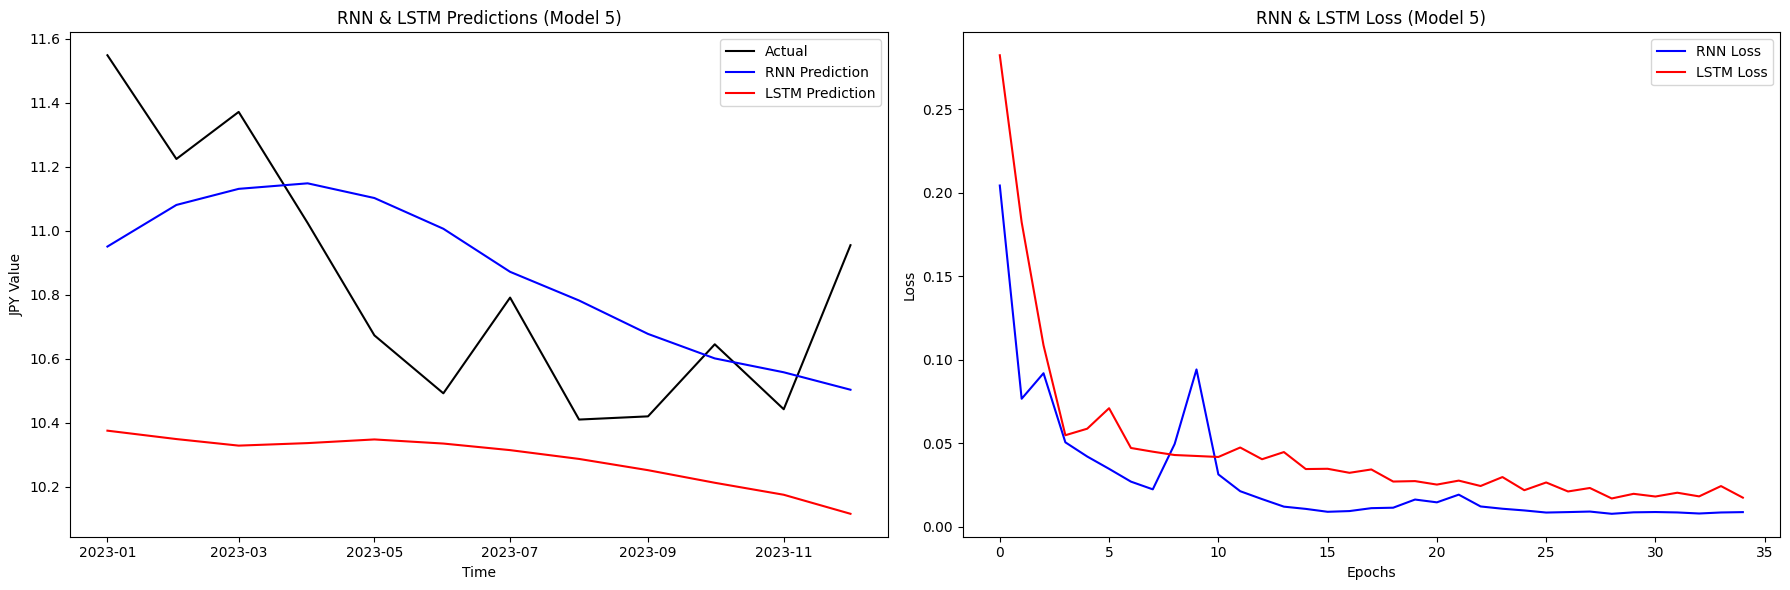


Training Model 6: Layers=3, Hidden Sizes=[128, 256, 512], Dropout=0.4, LR=0.0001, Epochs=40, Optimizer=Adam


Model 6 Training Progress:  15%|█▌        | 6/40 [00:00<00:00, 58.81it/s]

Epoch 1/40 -> RNN Loss: 0.29902, LSTM Loss: 0.32770
Epoch 10/40 -> RNN Loss: 0.07216, LSTM Loss: 0.22448


Model 6 Training Progress:  75%|███████▌  | 30/40 [00:00<00:00, 56.64it/s]

Epoch 20/40 -> RNN Loss: 0.05536, LSTM Loss: 0.10902
Epoch 30/40 -> RNN Loss: 0.04699, LSTM Loss: 0.07033


Model 6 Training Progress: 100%|██████████| 40/40 [00:00<00:00, 56.55it/s]


Epoch 40/40 -> RNN Loss: 0.03224, LSTM Loss: 0.05671


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

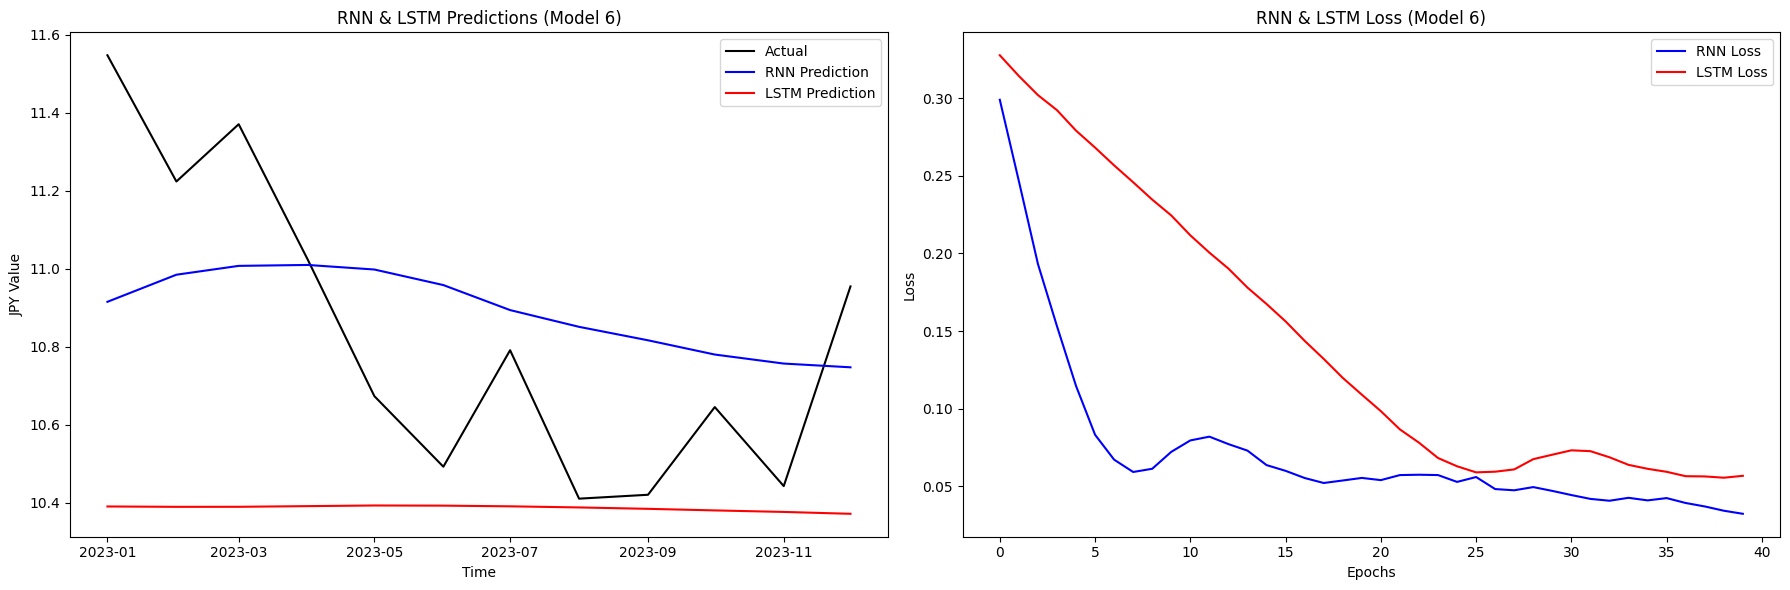


Training Model 7: Layers=3, Hidden Sizes=[256, 512, 1024], Dropout=0.45, LR=5e-05, Epochs=50, Optimizer=AdamW


Model 7 Training Progress:   6%|▌         | 3/50 [00:00<00:02, 20.19it/s]

Epoch 1/50 -> RNN Loss: 0.29003, LSTM Loss: 0.24999


Model 7 Training Progress:  24%|██▍       | 12/50 [00:00<00:01, 19.15it/s]

Epoch 10/50 -> RNN Loss: 0.03759, LSTM Loss: 0.05346


Model 7 Training Progress:  44%|████▍     | 22/50 [00:01<00:01, 18.73it/s]

Epoch 20/50 -> RNN Loss: 0.02898, LSTM Loss: 0.05329


Model 7 Training Progress:  64%|██████▍   | 32/50 [00:01<00:00, 18.85it/s]

Epoch 30/50 -> RNN Loss: 0.00941, LSTM Loss: 0.02875


Model 7 Training Progress:  84%|████████▍ | 42/50 [00:02<00:00, 18.58it/s]

Epoch 40/50 -> RNN Loss: 0.01209, LSTM Loss: 0.01974


Model 7 Training Progress: 100%|██████████| 50/50 [00:02<00:00, 18.83it/s]


Epoch 50/50 -> RNN Loss: 0.00812, LSTM Loss: 0.01426


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

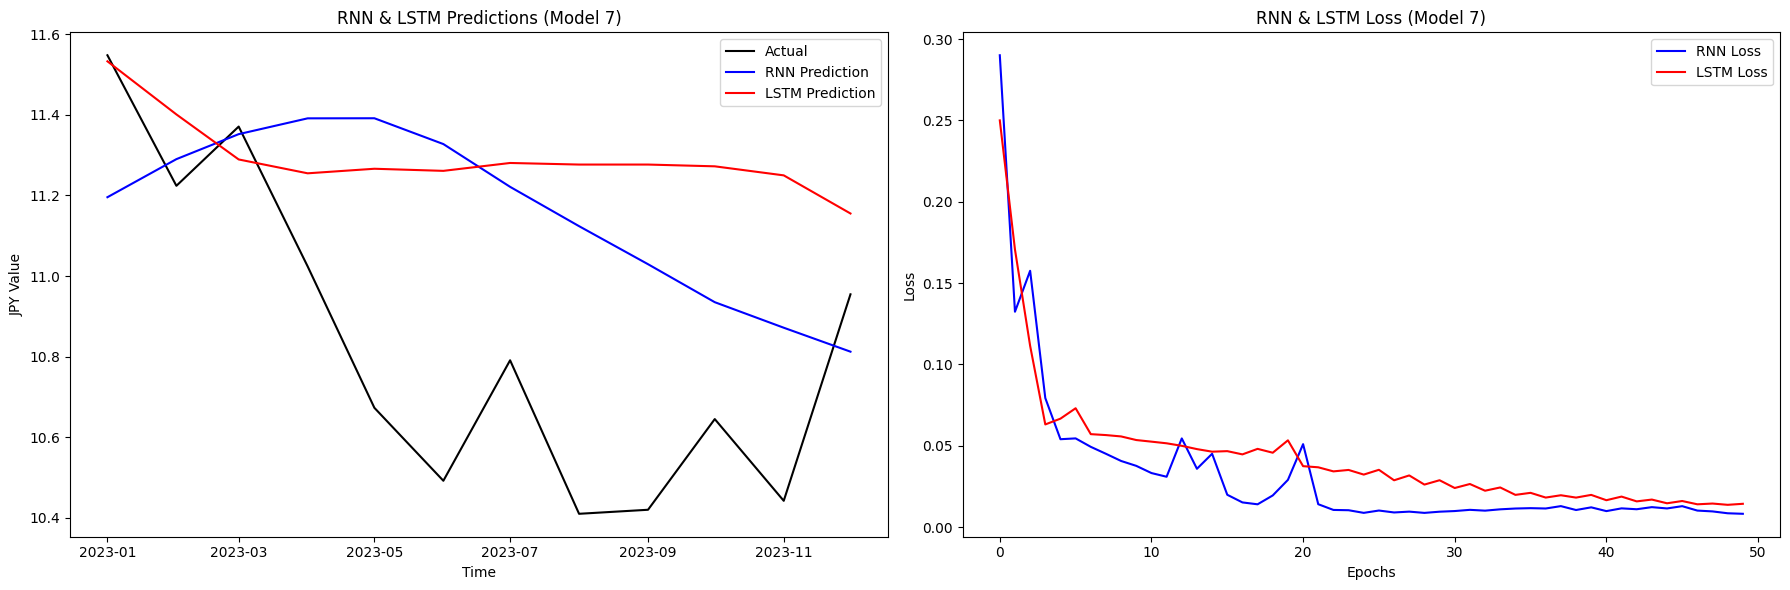


Training Model 8: Layers=3, Hidden Sizes=[512, 1024, 2048], Dropout=0.5, LR=1e-05, Epochs=60, Optimizer=Adam


Model 8 Training Progress:   2%|▏         | 1/60 [00:00<00:11,  5.28it/s]

Epoch 1/60 -> RNN Loss: 0.29326, LSTM Loss: 0.26691


Model 8 Training Progress:  18%|█▊        | 11/60 [00:02<00:09,  5.00it/s]

Epoch 10/60 -> RNN Loss: 0.12060, LSTM Loss: 0.23439


Model 8 Training Progress:  33%|███▎      | 20/60 [00:03<00:08,  4.98it/s]

Epoch 20/60 -> RNN Loss: 0.05795, LSTM Loss: 0.19931


Model 8 Training Progress:  50%|█████     | 30/60 [00:05<00:06,  4.97it/s]

Epoch 30/60 -> RNN Loss: 0.05458, LSTM Loss: 0.16469


Model 8 Training Progress:  67%|██████▋   | 40/60 [00:07<00:04,  4.96it/s]

Epoch 40/60 -> RNN Loss: 0.04782, LSTM Loss: 0.12798


Model 8 Training Progress:  83%|████████▎ | 50/60 [00:10<00:02,  4.93it/s]

Epoch 50/60 -> RNN Loss: 0.04498, LSTM Loss: 0.08854


Model 8 Training Progress: 100%|██████████| 60/60 [00:12<00:00,  4.99it/s]

Epoch 60/60 -> RNN Loss: 0.03689, LSTM Loss: 0.06099


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

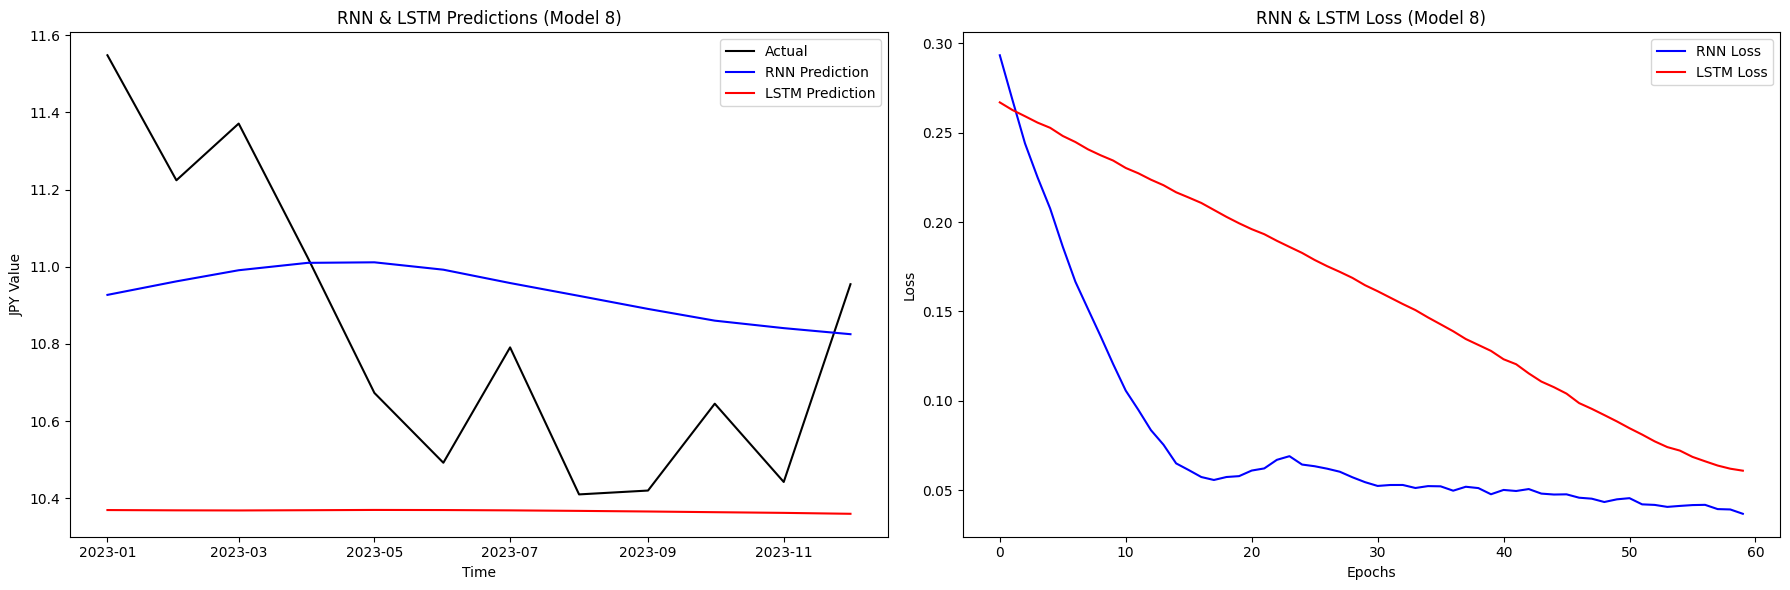


Training Model 9: Layers=3, Hidden Sizes=[128, 256, 512], Dropout=0.3, LR=0.0003, Epochs=30, Optimizer=SGD


Model 9 Training Progress:  20%|██        | 6/30 [00:00<00:00, 59.69it/s]

Epoch 1/30 -> RNN Loss: 0.28654, LSTM Loss: 0.29034
Epoch 10/30 -> RNN Loss: 0.06584, LSTM Loss: 0.08737


Model 9 Training Progress: 100%|██████████| 30/30 [00:00<00:00, 55.69it/s]

Epoch 20/30 -> RNN Loss: 0.06289, LSTM Loss: 0.05601
Epoch 30/30 -> RNN Loss: 0.05447, LSTM Loss: 0.04965


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

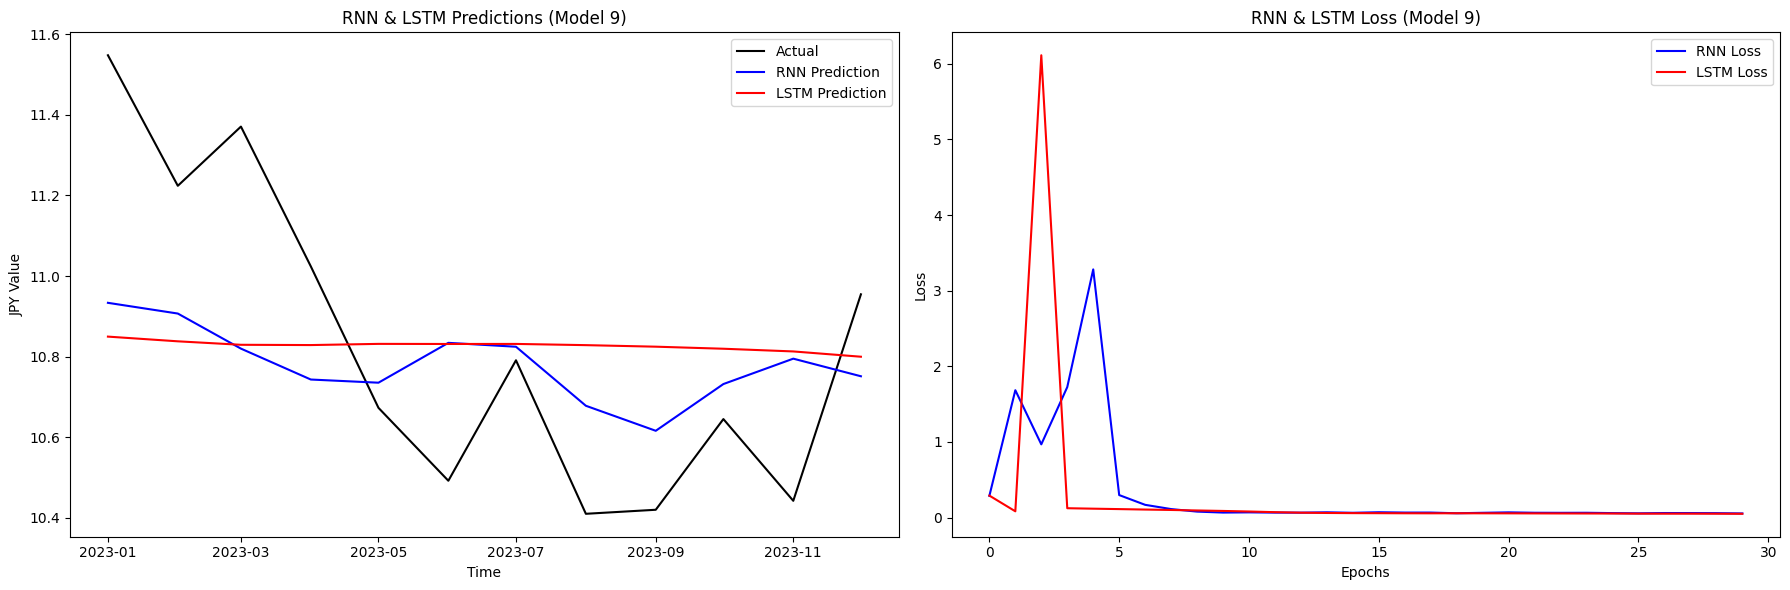


Training Model 10: Layers=4, Hidden Sizes=[64, 128, 256, 512], Dropout=0.4, LR=0.0001, Epochs=50, Optimizer=Adam


Model 10 Training Progress:  12%|█▏        | 6/50 [00:00<00:00, 54.65it/s]

Epoch 1/50 -> RNN Loss: 0.26439, LSTM Loss: 0.29598
Epoch 10/50 -> RNN Loss: 0.08683, LSTM Loss: 0.20431


Model 10 Training Progress:  60%|██████    | 30/50 [00:00<00:00, 52.30it/s]

Epoch 20/50 -> RNN Loss: 0.06453, LSTM Loss: 0.10159
Epoch 30/50 -> RNN Loss: 0.05074, LSTM Loss: 0.07453


Model 10 Training Progress:  96%|█████████▌| 48/50 [00:00<00:00, 49.66it/s]

Epoch 40/50 -> RNN Loss: 0.03921, LSTM Loss: 0.06099


Model 10 Training Progress: 100%|██████████| 50/50 [00:00<00:00, 50.94it/s]


Epoch 50/50 -> RNN Loss: 0.01640, LSTM Loss: 0.06270


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

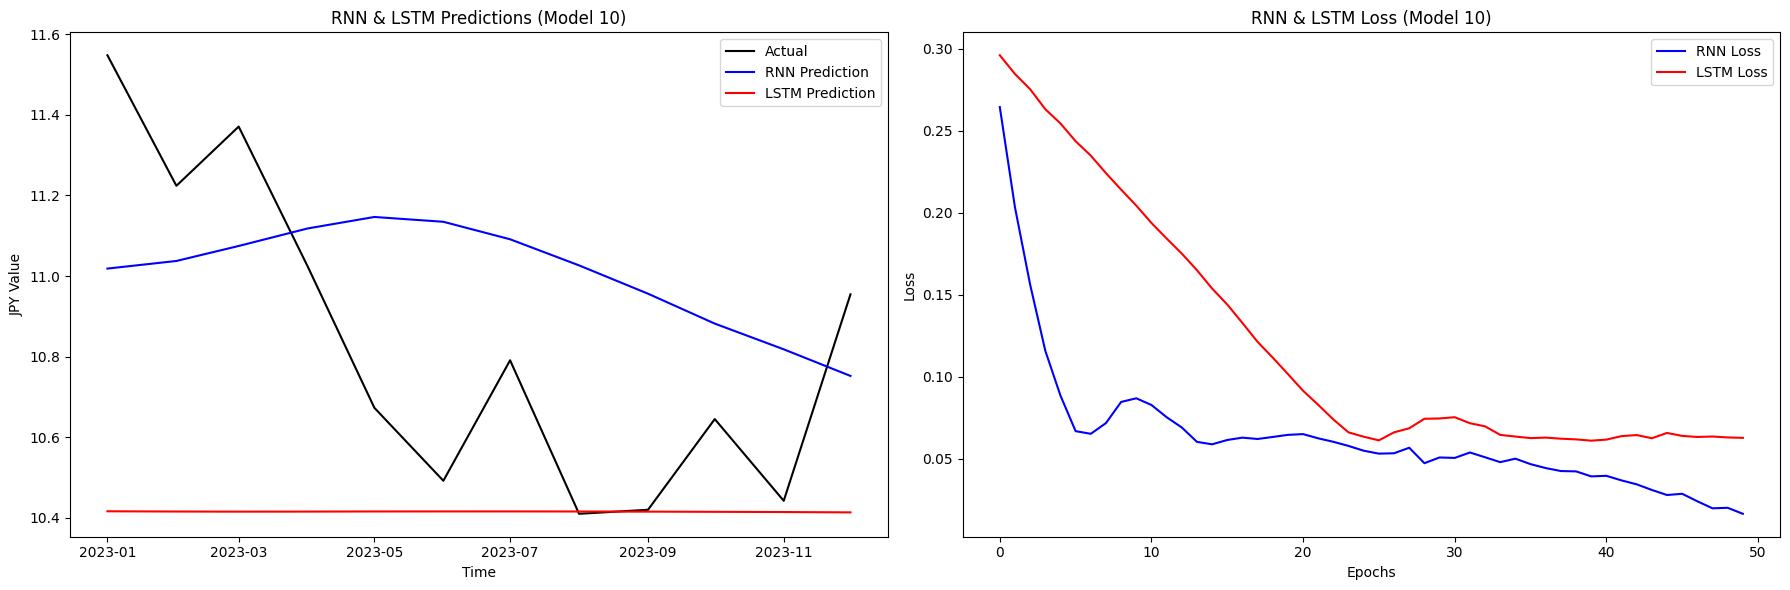

In [24]:
# Storing nilai loss
results = []

for idx, config in enumerate(configs):
    loss_rnn_list = []
    loss_lstm_list = []
    loss_gru_list = []

    hidden_sizes = config["hidden_sizes"]
    dropout = config["dropout"]
    lr = config["lr"]
    epochs = config["epochs"]
    optimizer_name = config["optimizer"]

    # Buat model dengan hidden size bervariasi
    try:
      model_rnn = CustomRNN(input_size, hidden_sizes, output_size, dropout).to(device)
      model_lstm = CustomLSTM(input_size, hidden_sizes, output_size, dropout).to(device)
    except:
      model_rnn = CustomRNN(input_size, hidden_sizes, output_size, dropout)
      model_lstm = CustomLSTM(input_size, hidden_sizes, output_size, dropout)

    # Pilih optimizer
    optimizer_rnn = optim.Adam(model_rnn.parameters(), lr=lr) if optimizer_name == "Adam" else optim.RMSprop(model_rnn.parameters(), lr=lr)
    optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=lr) if optimizer_name == "Adam" else optim.RMSprop(model_lstm.parameters(), lr=lr)

    criterion = nn.MSELoss()

    print(f"\nTraining Model {idx+1}: Layers={len(hidden_sizes)}, Hidden Sizes={hidden_sizes}, Dropout={dropout}, LR={lr}, Epochs={epochs}, Optimizer={optimizer_name}")

    # Training Loop
    for epoch in tqdm(range(epochs), desc=f"Model {idx+1} Training Progress"):
        optimizer_rnn.zero_grad()
        optimizer_lstm.zero_grad()

        # Forward pass
        output_rnn = model_rnn(X_train)
        output_lstm = model_lstm(X_train)

        # Compute loss
        loss_rnn = criterion(output_rnn, y_train)
        loss_lstm = criterion(output_lstm, y_train)

        # Backpropagation
        loss_rnn.backward()
        loss_lstm.backward()

        # Update weights
        optimizer_rnn.step()
        optimizer_lstm.step()

        # Storing the loss values for plotting
        loss_rnn_list.append(loss_rnn.item())
        loss_lstm_list.append(loss_lstm.item())

        # Print loss setiap 10 epoch
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} -> RNN Loss: {loss_rnn.item():.5f}, LSTM Loss: {loss_lstm.item():.5f}")

    # Evaluasi Model
    model_rnn.eval()
    model_lstm.eval()

    with torch.no_grad():
        pred_rnn = model_rnn(X_test)
        pred_lstm = model_lstm(X_test)

    # Hitung MSE
    mse_rnn = criterion(pred_rnn, y_test).item()
    mse_lstm = criterion(pred_lstm, y_test).item()

    avg_loss_rnn = sum(loss_rnn_list) / len(loss_rnn_list)
    avg_loss_lstm = sum(loss_lstm_list) / len(loss_lstm_list)

    # Simpan rata-rata loss
    results.append([
        idx+1, len(hidden_sizes), hidden_sizes, dropout, lr, epochs, optimizer_name,
        avg_loss_rnn, avg_loss_lstm,  mse_rnn, mse_lstm
    ])

    # Inverse transform untuk mendapatkan nilai asli
    # After training and prediction:
    train_size = len(train_data)  # Assuming train_data is your training DataFrame
    # test_index = df.index[train_size:] # This line was causing the error
    test_index = test_data.index  # This line selects the index from the test_data DataFrame

    # Inverse transform to get original scale
    # Inverse transform to get original scale
    y_test_inv = scaler.inverse_transform(y_test.cpu().reshape(-1, 1))  # Move y_test to CPU before reshape
    y_pred_rnn_inv = scaler.inverse_transform(pred_rnn.cpu().reshape(-1, 1))  # Move pred_rnn to CPU
    y_pred_lstm_inv = scaler.inverse_transform(pred_lstm.cpu().reshape(-1, 1))  # Move pred_lstm to CPU

    # Plotting
    plt.figure(figsize=(12, 6))


    # Ensure test_index and y values have the same length for plotting
    test_index_plot = test_index[12:]  # Adjust index for plotting

    # Membuat subplot 2x3 untuk prediksi dan loss


    plt.figure(figsize=(12, 6))

    # Membuat subplot 1x2 untuk prediksi dan loss
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot untuk RNN dan LSTM - Prediksi
    axes[0].plot(test_index_plot, y_test_inv, label='Actual', color='black')
    axes[0].plot(test_index_plot, y_pred_rnn_inv, label='RNN Prediction', color='blue')
    axes[0].plot(test_index_plot, y_pred_lstm_inv, label='LSTM Prediction', color='red')
    axes[0].set_title(f'RNN & LSTM Predictions (Model {idx+1})')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('JPY Value')
    axes[0].legend()

    # Plot untuk RNN dan LSTM - Loss
    axes[1].plot(range(epochs), loss_rnn_list, label='RNN Loss', color='blue')
    axes[1].plot(range(epochs), loss_lstm_list, label='LSTM Loss', color='red')
    axes[1].set_title(f'RNN & LSTM Loss (Model {idx+1})')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    os.makedirs("plots", exist_ok=True)
    # Save the plot as an image
    plot_filename = f"plots/model_{idx+1}_plots.png"
    plt.tight_layout()
    plt.savefig(plot_filename)  # Save the figure
    plt.show()  # Show the plot




In [22]:
columns = ["Model No", "Num Layers", "Hidden Size", "Dropout", "Learning Rate", "Epochs", "Optimizer",
           "Final RNN Loss", "Final LSTM Loss",
           "Test MSE RNN", "Test MSE LSTM"]

df_results = pd.DataFrame(results, columns=columns)
df_results


,Model No,Num Layers,Hidden Size,Dropout,Learning Rate,Epochs,Optimizer,Final RNN Loss,Final LSTM Loss,Test MSE RNN,Test MSE LSTM
0,1,1,[16],0.10,0.00100,10,Adam,0.367447,0.186677,0.258970,0.117861
1,2,1,[32],0.10,0.00080,15,Adam,0.081458,0.439577,0.005583,0.329272
2,3,2,"[64, 128]",0.25,0.00050,25,Adam,0.076209,0.148349,0.002039,0.010070
3,4,3,"[64, 128, 256]",0.30,0.00030,30,RMSprop,0.069834,0.059730,0.002051,0.003855
4,5,2,"[128, 256]",0.35,0.00020,35,AdamW,0.034255,0.051893,0.002384,0.007118
5,6,3,"[128, 256, 512]",0.40,0.00010,40,Adam,0.065302,0.116863,0.002220,0.006579
6,7,3,"[256, 512, 1024]",0.45,0.00005,50,AdamW,0.031890,0.046480,0.005146,0.006920
7,8,3,"[512, 1024, 2048]",0.50,0.00001,60,Adam,0.072905,0.172188,0.002016,0.005620
8,9,3,"[128, 256, 512]",0.30,0.00030,30,SGD,0.328725,0.312881,0.002171,0.002110
9,10,4,"[64, 128, 256, 512]",0.40,0.00010,50,Adam,0.065889,0.102702,0.002120,0.003878
